In [356]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.gridspec as gridspec

country = pd.read_csv("../dataset/country.csv")
league = pd.read_csv("../dataset/league.csv")
match = pd.read_csv("../dataset/match.csv")
player = pd.read_csv("../dataset/player.csv")
player_attributes = pd.read_csv("../dataset/player_attributes.csv")
team = pd.read_csv("../dataset/team.csv", encoding = "ISO-8859-1")
team_attributes = pd.read_csv("../dataset/team_attributes.csv")

In [357]:
team_attributes

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,2/22/10 0:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,9/19/14 0:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,9/10/15 0:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,2/22/10 0:00,70,Fast,NaN,Little,70,Long,Organised,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,2/22/11 0:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,2/22/11 0:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,10000,2/22/12 0:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,10000,9/20/13 0:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,10000,9/19/14 0:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


# change categorical variables to numerical values

In [358]:
num_col = ['buildUpPlaySpeed', 
       'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth']
cat_col = ['buildUpPlaySpeedClass','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassingClass',
           'chanceCreationCrossingClass', 'chanceCreationShootingClass' ,'chanceCreationPositioningClass', 'defencePressureClass', 
           'defenceAggressionClass', 'defenceTeamWidthClass', 'defenceDefenderLineClass']

In [359]:
# put ordinal categorical variables in order

cats = [['Slow', 'Balanced', 'Fast'],
 ['Short', 'Mixed', 'Long'],
 ['Free Form', 'Organised'],
 ['Safe','Normal', 'Risky' ],
 ['Little','Normal', 'Lots'],
 ['Little','Normal', 'Lots'],
 ['Free Form','Organised'],
 ['Deep', 'Medium', 'High'],
 ['Contain', 'Press', 'Double'],
 ['Narrow', 'Normal', 'Wide'],
 ['Offside Trap','Cover']]


for i in range(len(cat_col)):
    col = cat_col[i]
    
    cat = pd.Categorical(team_attributes[col], categories = cats[i], ordered = True)
    labels, unique = pd.factorize(cat, sort = True)
    team_attributes[col] = labels


In [360]:
team_attributes

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,2/22/10 0:00,60,1,NaN,Little,50,1,1,60,...,55,1,1,50,1,55,1,45,1,1
1,9930,9/19/14 0:00,52,1,48.0,Normal,56,1,1,54,...,64,1,1,47,1,44,1,54,1,1
2,9930,9/10/15 0:00,47,1,41.0,Normal,54,1,1,54,...,64,1,1,47,1,44,1,54,1,1
3,8485,2/22/10 0:00,70,2,NaN,Little,70,2,1,70,...,70,2,1,60,1,70,2,70,2,1
4,8485,2/22/11 0:00,47,1,NaN,Little,52,1,1,53,...,52,1,1,47,1,47,1,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,2/22/11 0:00,52,1,NaN,Little,52,1,1,52,...,53,1,1,46,1,48,1,53,1,1
1454,10000,2/22/12 0:00,54,1,NaN,Little,51,1,1,47,...,50,1,1,44,1,55,1,53,1,1
1455,10000,9/20/13 0:00,54,1,NaN,Little,51,1,1,47,...,32,0,1,44,1,58,1,37,1,1
1456,10000,9/19/14 0:00,54,1,42.0,Normal,51,1,1,47,...,32,0,1,44,1,58,1,37,1,1


In [361]:
team_attributes.to_csv("team_attributes_OrdinalToNumber.csv")

In [362]:
team_attributes["date"] = pd.to_datetime(team_attributes["date"])
team_attributes["year"] = pd.DatetimeIndex(team_attributes['date']).year

# Numerical values

In [275]:
team_attributes[num_col].min()

buildUpPlaySpeed          20
buildUpPlayPassing        20
chanceCreationPassing     21
chanceCreationCrossing    20
chanceCreationShooting    22
defencePressure           23
defenceAggression         24
defenceTeamWidth          29
dtype: int64

In [276]:
team_attributes[num_col].max()

buildUpPlaySpeed          80
buildUpPlayPassing        80
chanceCreationPassing     80
chanceCreationCrossing    80
chanceCreationShooting    80
defencePressure           72
defenceAggression         72
defenceTeamWidth          73
dtype: int64

D:\softwares\anaconda\envs\data science\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


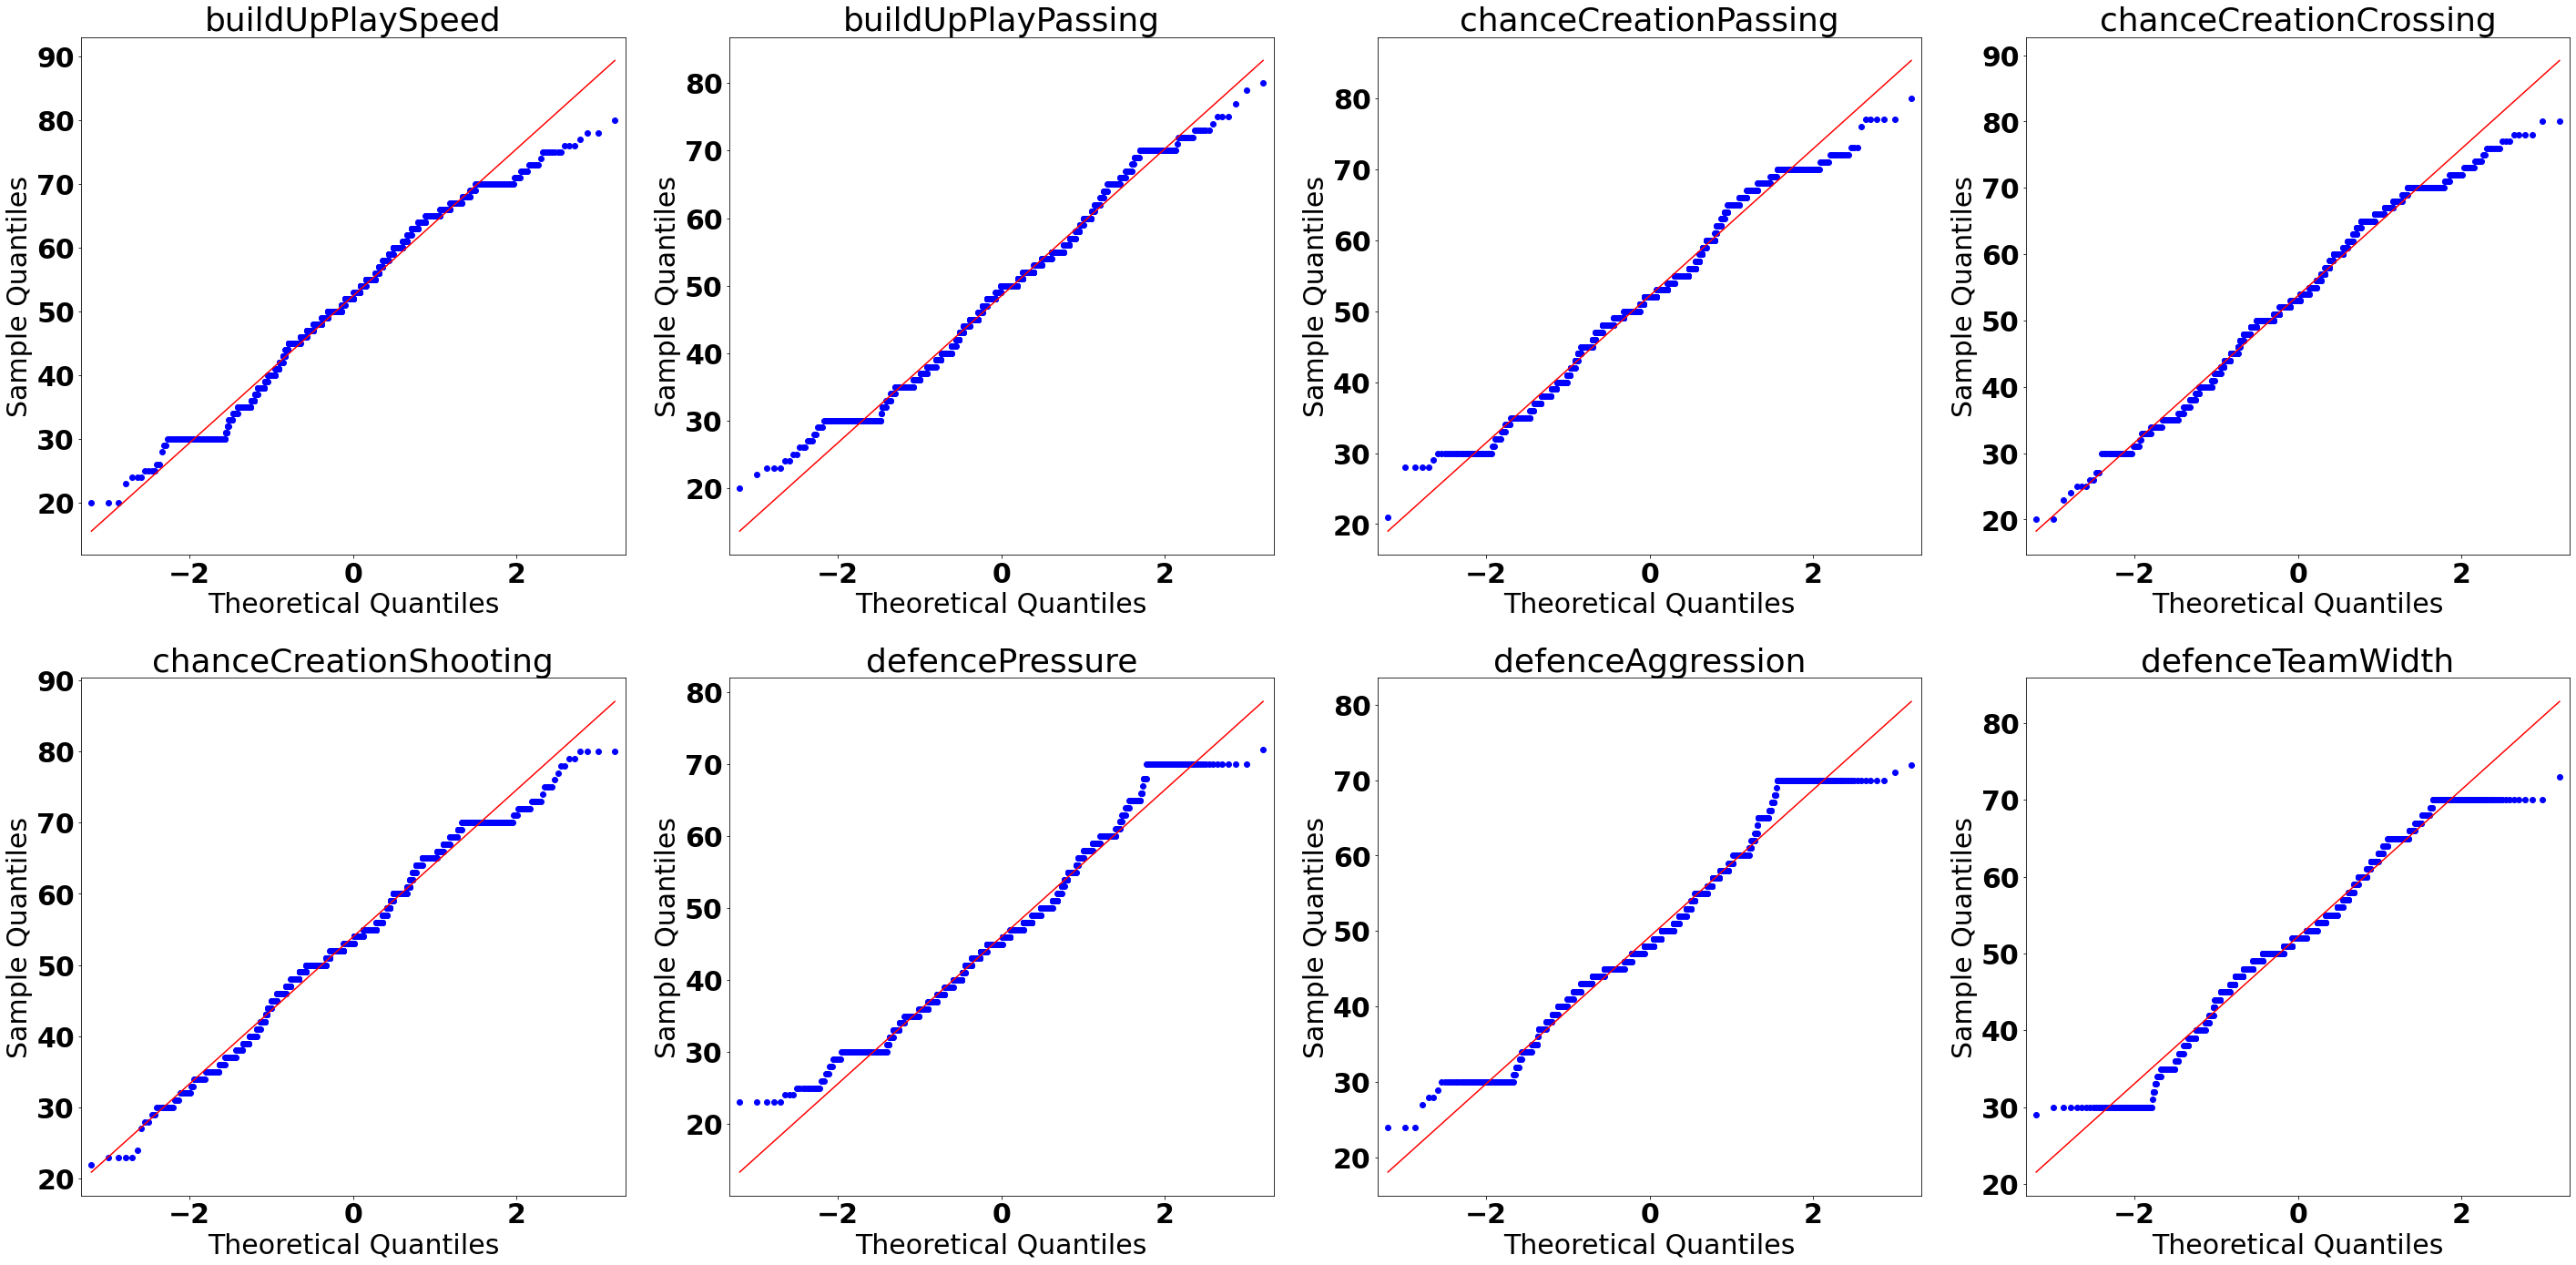

In [342]:
from statsmodels.graphics.gofplots import qqplot

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

plt.rc('font', **font)

fig = plt.figure(figsize = (40, 20), facecolor = "white")
ax1 = fig.add_subplot(2, 4, 1)
ax2 = fig.add_subplot(2, 4, 2)
ax3 = fig.add_subplot(2, 4, 3)
ax4 = fig.add_subplot(2, 4, 4)
ax5 = fig.add_subplot(2, 4, 5)
ax6 = fig.add_subplot(2, 4, 6)
ax7 = fig.add_subplot(2, 4, 7)
ax8 = fig.add_subplot(2, 4, 8)

i = num_col[0]
p1 = qqplot(team_attributes[i], line='s', ax= ax1)
ax1.title.set_text(i)

i = num_col[1]
p1 = qqplot(team_attributes[i], line='s', ax= ax2)
ax2.title.set_text(i)

i = num_col[2]
p1 = qqplot(team_attributes[i], line='s', ax= ax3)
ax3.title.set_text(i)

i = num_col[3]
p1 = qqplot(team_attributes[i], line='s', ax= ax4)
ax4.title.set_text(i)

i = num_col[4]
p1 = qqplot(team_attributes[i], line='s', ax= ax5)
ax5.title.set_text(i)

i = num_col[5]
p1 = qqplot(team_attributes[i], line='s', ax= ax6)
ax6.title.set_text(i)

i = num_col[6]
p1 = qqplot(team_attributes[i], line='s', ax= ax7)
ax7.title.set_text(i)

i = num_col[7]
p1 = qqplot(team_attributes[i], line='s', ax= ax8)
ax8.title.set_text(i)


fig.tight_layout()
fig.show()
plt.savefig('normal.pdf', bbox_inches='tight')

# Analyse relations of different attributes

In [289]:
team_attributes = pd.read_csv("team_attributes_OrdinalToNumber.csv")

In [290]:
cols =  ['buildUpPlaySpeed', 'buildUpPlayPassing', 'buildUpPlayPositioningClass','chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'chanceCreationPositioningClass','defencePressure', 'defenceAggression',
       'defenceTeamWidth', 'defenceDefenderLineClass']

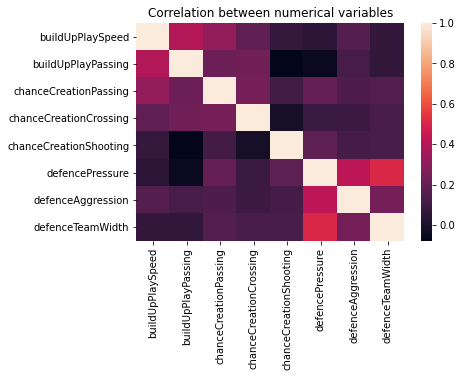

In [299]:
sns.heatmap(team_attributes[num_col].corr()).set_title("Correlation between numerical variables")
plt.savefig('corr.pdf', bbox_inches='tight')


In [157]:
print(team_attributes[team_attributes["buildUpPlaySpeedClass"]==0].buildUpPlaySpeed.min(), 
      team_attributes[team_attributes["buildUpPlaySpeedClass"]==0].buildUpPlaySpeed.max())
print(team_attributes[team_attributes["buildUpPlaySpeedClass"]==1].buildUpPlaySpeed.min(), 
      team_attributes[team_attributes["buildUpPlaySpeedClass"]==1].buildUpPlaySpeed.max())
print(team_attributes[team_attributes["buildUpPlaySpeedClass"]==2].buildUpPlaySpeed.min(), 
      team_attributes[team_attributes["buildUpPlaySpeedClass"]==2].buildUpPlaySpeed.max())

print(team_attributes[team_attributes["buildUpPlayDribblingClass"]==0].buildUpPlayDribbling.min(), 
      team_attributes[team_attributes["buildUpPlayDribblingClass"]==0].buildUpPlayDribbling.max())
print(team_attributes[team_attributes["buildUpPlayDribblingClass"]==1].buildUpPlayDribbling.min(), 
      team_attributes[team_attributes["buildUpPlayDribblingClass"]==1].buildUpPlayDribbling.max())
print(team_attributes[team_attributes["buildUpPlayDribblingClass"]==2].buildUpPlayDribbling.min(), 
      team_attributes[team_attributes["buildUpPlayDribblingClass"]==2].buildUpPlayDribbling.max())

print(team_attributes[team_attributes["buildUpPlayPassingClass"]==0].buildUpPlayPassing.min(), 
      team_attributes[team_attributes["buildUpPlayPassingClass"]==0].buildUpPlayPassing.max())
print(team_attributes[team_attributes["buildUpPlayPassingClass"]==1].buildUpPlayPassing.min(), 
      team_attributes[team_attributes["buildUpPlayPassingClass"]==1].buildUpPlayPassing.max())
print(team_attributes[team_attributes["buildUpPlayPassingClass"]==2].buildUpPlayPassing.min(), 
      team_attributes[team_attributes["buildUpPlayPassingClass"]==2].buildUpPlayPassing.max())

print(team_attributes[team_attributes["chanceCreationPassingClass"]==0].chanceCreationPassing.min(), 
      team_attributes[team_attributes["chanceCreationPassingClass"]==0].chanceCreationPassing.max())
print(team_attributes[team_attributes["chanceCreationPassingClass"]==1].chanceCreationPassing.min(), 
      team_attributes[team_attributes["chanceCreationPassingClass"]==1].chanceCreationPassing.max())
print(team_attributes[team_attributes["chanceCreationPassingClass"]==2].chanceCreationPassing.min(), 
      team_attributes[team_attributes["chanceCreationPassingClass"]==2].chanceCreationPassing.max())

print(team_attributes[team_attributes["chanceCreationCrossingClass"]==0].chanceCreationCrossing.min(), 
      team_attributes[team_attributes["chanceCreationCrossingClass"]==0].chanceCreationCrossing.max())
print(team_attributes[team_attributes["chanceCreationCrossingClass"]==1].chanceCreationCrossing.min(), 
      team_attributes[team_attributes["chanceCreationCrossingClass"]==1].chanceCreationCrossing.max())
print(team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationCrossing.min(), 
      team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationCrossing.max())

print(team_attributes[team_attributes["chanceCreationShootingClass"]==0].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationShootingClass"]==0].chanceCreationShooting.max())
print(team_attributes[team_attributes["chanceCreationShootingClass"]==1].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationShootingClass"]==1].chanceCreationShooting.max())
print(team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationShooting.max())

print(team_attributes[team_attributes["chanceCreationShootingClass"]==0].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationShootingClass"]==0].chanceCreationShooting.max())
print(team_attributes[team_attributes["chanceCreationShootingClass"]==1].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationShootingClass"]==1].chanceCreationShooting.max())
print(team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationShooting.max())

print(team_attributes[team_attributes["defenceAggressionClass"]==0].defenceAggression.min(), 
      team_attributes[team_attributes["defenceAggressionClass"]==0].defenceAggression.max())
print(team_attributes[team_attributes["defenceAggressionClass"]==1].defenceAggression.min(), 
      team_attributes[team_attributes["defenceAggressionClass"]==1].defenceAggression.max())
print(team_attributes[team_attributes["defenceAggressionClass"]==2].defenceAggression.min(), 
      team_attributes[team_attributes["defenceAggressionClass"]==2].defenceAggression.max())

print(team_attributes[team_attributes["defenceTeamWidthClass"]==0].defenceTeamWidth.min(), 
      team_attributes[team_attributes["defenceTeamWidthClass"]==0].defenceTeamWidth.max())
print(team_attributes[team_attributes["defenceTeamWidthClass"]==1].defenceTeamWidth.min(), 
      team_attributes[team_attributes["defenceTeamWidthClass"]==1].defenceTeamWidth.max())
print(team_attributes[team_attributes["defenceTeamWidthClass"]==2].defenceTeamWidth.min(), 
      team_attributes[team_attributes["defenceTeamWidthClass"]==2].defenceTeamWidth.max())

print(team_attributes[team_attributes["defencePressureClass"]==0].defencePressure.min(), 
      team_attributes[team_attributes["defencePressureClass"]==0].defencePressure.max())
print(team_attributes[team_attributes["defencePressureClass"]==1].defencePressure.min(), 
      team_attributes[team_attributes["defencePressureClass"]==1].defencePressure.max())
print(team_attributes[team_attributes["defencePressureClass"]==2].defencePressure.min(), 
      team_attributes[team_attributes["defencePressureClass"]==2].defencePressure.max())


20 33
34 66
67 80
24.0 33.0
34.0 66.0
67.0 77.0
20 33
34 66
67 80
21 33
34 66
67 80
20 33
34 66
67 80
22 33
34 66
29 79
22 33
34 66
29 79
24 33
34 66
67 72
29 33
34 66
67 73
23 33
34 66
67 72


# Group by team/year, rename teamid

In [377]:
team_attributes = pd.read_csv("team_attributes_OrdinalToNumber.csv", index_col = 0)

In [378]:
team_attributes

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,2/22/10 0:00,60,1,NaN,Little,50,1,1,60,...,55,1,1,50,1,55,1,45,1,1
1,9930,9/19/14 0:00,52,1,48.0,Normal,56,1,1,54,...,64,1,1,47,1,44,1,54,1,1
2,9930,9/10/15 0:00,47,1,41.0,Normal,54,1,1,54,...,64,1,1,47,1,44,1,54,1,1
3,8485,2/22/10 0:00,70,2,NaN,Little,70,2,1,70,...,70,2,1,60,1,70,2,70,2,1
4,8485,2/22/11 0:00,47,1,NaN,Little,52,1,1,53,...,52,1,1,47,1,47,1,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,2/22/11 0:00,52,1,NaN,Little,52,1,1,52,...,53,1,1,46,1,48,1,53,1,1
1454,10000,2/22/12 0:00,54,1,NaN,Little,51,1,1,47,...,50,1,1,44,1,55,1,53,1,1
1455,10000,9/20/13 0:00,54,1,NaN,Little,51,1,1,47,...,32,0,1,44,1,58,1,37,1,1
1456,10000,9/19/14 0:00,54,1,42.0,Normal,51,1,1,47,...,32,0,1,44,1,58,1,37,1,1


In [379]:
team_attributes[team_attributes.team_id ==274581]

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
858,274581,9/10/15 0:00,50,1,50.0,Normal,50,1,1,50,...,50,1,1,45,1,45,1,50,1,1


In [380]:
attr_var = team_attributes[["team_id"]+num_col].groupby(by = "team_id").var()
attr_var.mean()

buildUpPlaySpeed          98.804197
buildUpPlayPassing        84.513564
chanceCreationPassing     79.838564
chanceCreationCrossing    86.146776
chanceCreationShooting    84.831204
defencePressure           74.210219
defenceAggression         77.362835
defenceTeamWidth          67.778224
dtype: float64

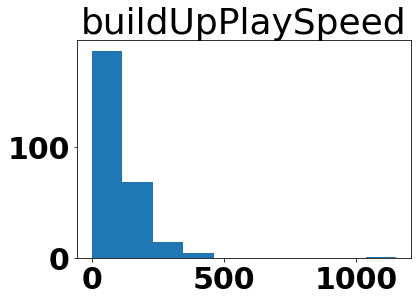

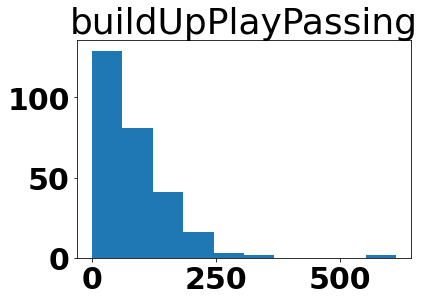

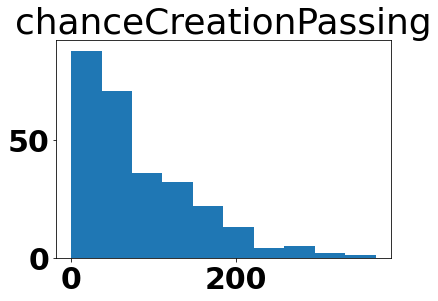

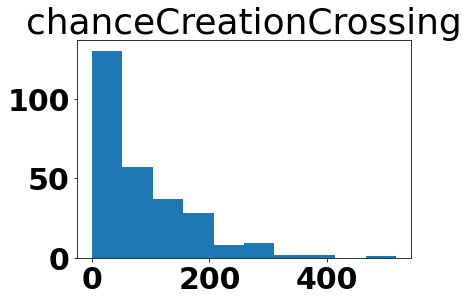

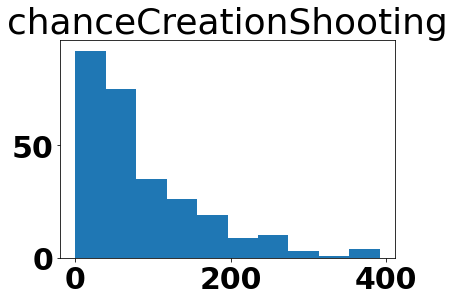

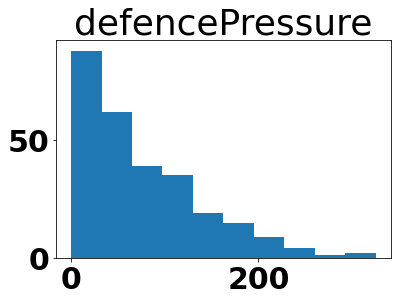

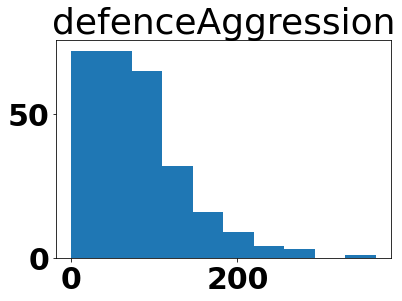

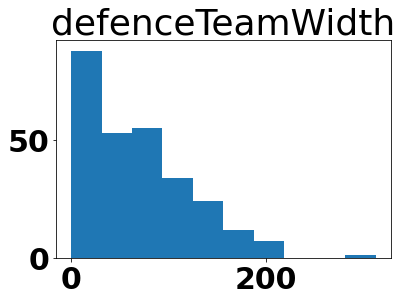

In [381]:
for i in num_col:
    plt.hist(attr_var[i])
    plt.title(i)
    plt.show()

In [382]:
team_attributes["date"] = pd.DatetimeIndex(team_attributes["date"])
team_attributes["year"] = pd.DatetimeIndex(team_attributes['date']).year

In [383]:
attr_mean = team_attributes.groupby(by = ["team_id", "year"]).mean()

attr_mean["team_id_tuple"] = attr_mean.index

In [384]:
attr_mean[["team_id", "year"]] = attr_mean["team_id_tuple"].apply(pd.Series)

In [385]:
attr_mean["new_id"] = attr_mean["team_id"].map(str) + attr_mean["year"].map(str)

In [386]:
attr_mean

buildUpPlaySpeed  buildUpPlaySpeedClass  buildUpPlayDribbling  \
team_id year                                                                  
1601    2010                30                      0                   NaN   
        2011                48                      1                   NaN   
        2012                53                      1                   NaN   
        2013                53                      1                   NaN   
        2014                53                      1                  48.0   
...                        ...                    ...                   ...   
158085  2014                69                      2                  66.0   
        2015                65                      1                  66.0   
208931  2014                32                      0                  46.0   
        2015                80                      2                  45.0   
274581  2015                50                      1                  50.0   

              buildUpPlayPassing  buildUpPlayPassingClass  \
team_id year                                                
1601    2010                  40                        1   
        2011                  51                        1   
        2012                  55                        1   
        2013                  55                        1   
        2014                  38                        1   
...                          ...                      ...   
158085  2014                  39                        1   
        2015                  39                        1   
208931  2014                  31                        0   
        2015                  65                        1   
274581  2015                  50                        1   

              buildUpPlayPositioningClass  chanceCreationPassing  \
team_id year                                                       
1601    2010                            1                     50   
        2011                            1                     68   
        2012                            1                     44   
        2013                            1                     44   
        2014                            1                     66   
...                                   ...                    ...   
158085  2014                            1                     55   
        2015                            1                     55   
208931  2014                            1                     47   
        2015                            1                     70   
274581  2015                            1                     50   

              chanceCreationPassingClass  chanceCreationCrossing  \
team_id year                                                       
1601    2010                           1                      35   
        2011                           2                      67   
        2012                           1                      65   
        2013                           1                      65   
        2014                           1                      65   
...                                  ...                     ...   
158085  2014                           1                      59   
        2015                           1                      59   
208931  2014                           1                      36   
        2015                           2                      40   
274581  2015                           1                      50   

              chanceCreationCrossingClass  ...  defencePressureClass  \
team_id year                               ...                         
1601    2010                            1  ...                     1   
        2011                            2  ...                     1   
        2012                            1  ...                     1   
        2013                            1  ...                

In [387]:
attr_mean.to_csv("team_attributes_GrpByNewTEAMID.csv")

# Try to fill null-values

In [108]:
attr_mean[attr_mean["buildUpPlayDribbling"].isnull()].buildUpPlayDribblingClass.unique()

array([0], dtype=int64)

In [110]:
attr_mean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1457 entries, (1601, 2010) to (274581, 2015)
Data columns (total 21 columns):
buildUpPlaySpeed                  1457 non-null int64
buildUpPlaySpeedClass             1457 non-null int64
buildUpPlayDribbling              488 non-null float64
buildUpPlayDribblingClass         1457 non-null int64
buildUpPlayPassing                1457 non-null int64
buildUpPlayPassingClass           1457 non-null int64
buildUpPlayPositioningClass       1457 non-null int64
chanceCreationPassing             1457 non-null int64
chanceCreationPassingClass        1457 non-null int64
chanceCreationCrossing            1457 non-null int64
chanceCreationCrossingClass       1457 non-null int64
chanceCreationShooting            1457 non-null int64
chanceCreationShootingClass       1457 non-null int64
chanceCreationPositioningClass    1457 non-null int64
defencePressure                   1457 non-null int64
defencePressureClass              1457 non-null int64
defence

I think we should probably just dump the "buildUpPlayDribbling" and "buildUpPlayDribblingClass"    ??

## Rename teamid of match file

In [147]:
match["date"] = pd.to_datetime(match["date"])
match["year"] = pd.DatetimeIndex(match['date']).year
match["month"] = pd.DatetimeIndex(match['date']).month
match["day"] = pd.DatetimeIndex(match['date']).day
match["week_num"] = match['date'].dt.week

In [148]:
match

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,year,month,day,week_num
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,1.78,3.25,4.00,1.73,3.40,4.20,2008,8,17,33
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,1.85,3.25,3.75,1.91,3.25,3.60,2008,8,16,33
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,2.50,3.20,2.50,2.30,3.20,2.75,2008,8,16,33
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,1.50,3.75,5.50,1.44,3.75,6.50,2008,8,17,33
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,4.50,3.50,1.65,4.75,3.30,1.67,2008,8,16,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,9,22,39
25975,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,9,23,39
25976,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,9,23,39
25977,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,9,22,39


In [149]:
match["home_team_id_new"] = match["home_team_id"].map(str) + match["year"].map(str)
match["away_team_id_new"] = match["away_team_id"].map(str) + match["year"].map(str)

In [150]:
match

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,...,GBA,BSH,BSD,BSA,year,month,day,week_num,home_team_id_new,away_team_id_new
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,4.00,1.73,3.40,4.20,2008,8,17,33,99872008,99932008
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,3.75,1.91,3.25,3.60,2008,8,16,33,100002008,99942008
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,2.50,2.30,3.20,2.75,2008,8,16,33,99842008,86352008
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,5.50,1.44,3.75,6.50,2008,8,17,33,99912008,99982008
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,1.65,4.75,3.30,1.67,2008,8,16,33,79472008,99852008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0,...,NaN,NaN,NaN,NaN,2015,9,22,39,101902015,101912015
25975,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2,...,NaN,NaN,NaN,NaN,2015,9,23,39,98242015,101992015
25976,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,0,...,NaN,NaN,NaN,NaN,2015,9,23,39,99562015,101792015
25977,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,0,...,NaN,NaN,NaN,NaN,2015,9,22,39,78962015,102432015


In [151]:
match.to_csv("match_newTeamID.csv")